In [91]:
import numpy as np
import python.middlebury
import matplotlib.pyplot as plt
import scipy as sp

from PIL import Image

In [93]:
# I1 = plt.imread("data/nasa/nasa9.png")
# I2 = plt.imread("data/nasa/nasa10.png")

# I1 = plt.imread("data/yosemite/yos9.png")
# I2 = plt.imread("data/yosemite/yos10.png")

I1 = Image.open("data/rubberwhale/frame10.png").convert('L')
I2 = Image.open("data/rubberwhale/frame11.png").convert('L')

In [113]:
def gradHorn(I1,I2):

    kernel_y = -np.array([
        [0,0,0],
        [0,-1,-1],
        [0,1,1]
    ])

    kernel_x = -np.array([
        [0,0,0],
        [0,-1,1],
        [0,-1,1]
    ])

    kernel_t = -np.array([
        [0,0,0],
        [0,1,1],
        [0,1,1]
    ])

    Ix1 = sp.signal.convolve2d(I1, kernel_x, boundary='symm', mode='same')
    Ix2 = sp.signal.convolve2d(I2, kernel_x, boundary='symm', mode='same')

    Ix = 0.25 * (Ix1 + Ix2)

    Iy1 = sp.signal.convolve2d(I1, kernel_y, boundary='symm', mode='same')
    Iy2 = sp.signal.convolve2d(I2, kernel_y, boundary='symm', mode='same')

    Iy = 0.25 * (Iy1 + Iy2)

    It1 = sp.signal.convolve2d(I1, kernel_t, boundary='symm', mode='same')
    It2 = sp.signal.convolve2d(I2, kernel_t, boundary='symm', mode='same')

    It = 0.25 * (It1 - It2)

    return Ix, Iy, It

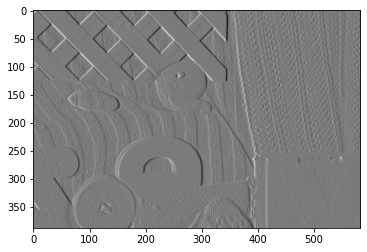

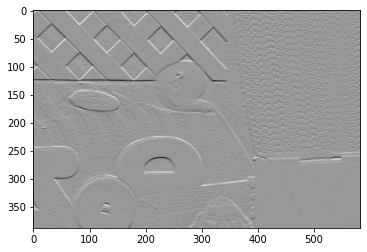

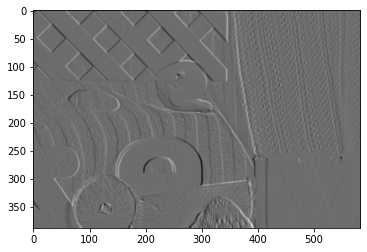

In [114]:
Ix, Iy, It = gradHorn(I1,I2)


plt.imshow(Ix, cmap="gray")
plt.show()

plt.imshow(Iy, cmap="gray")
plt.show()

plt.imshow(It, cmap="gray")
plt.show()

In [129]:
def horn(I1,I2,alpha, N):
    A = np.array([
        [1/12,1/6,1/12],
        [1/6,0,1/6],
        [1/12,1/6,1/12]
    ])

    u = np.zeros_like(I1)
    v = np.zeros_like(I1)

    Ix, Iy, It = gradHorn(I1,I2)

    bigBot = alpha + np.power(Ix,2) + np.power(Iy,2)

    for i in range(N):

        uinv = sp.signal.convolve2d(u, A, boundary='symm', mode='same')
        vinv = sp.signal.convolve2d(v, A, boundary='symm', mode='same')

        bigTop = Ix*uinv+Iy*vinv+It
        

        big = bigTop/bigBot

        u = uinv - Ix*big
        v = vinv - Iy*big

    w = np.dstack((u,v))
    img = python.middlebury.computeColor(w)

    plt.imshow(img)
    plt.show()

    return w

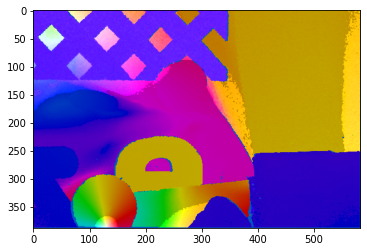

In [130]:
wgt = python.middlebury.readflo("data/rubberwhale/correct_rubberwhale10.flo")

img = python.middlebury.computeColor(w)

plt.imshow(img)
plt.show()

In [153]:
def error(wgt, wobs):

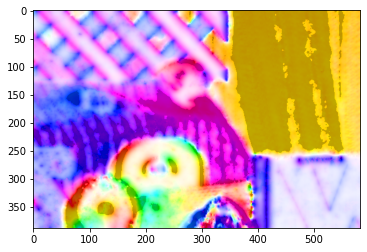

In [159]:
wobs = horn(I1,I2,1000, 100)


In [160]:
print(np.log(error(wgt,wobs)))

39.02520552045853


In [ ]:

errorArr = np.array((1000))
for i in range(1000):
    